<a href="https://colab.research.google.com/github/gbaser54/knn-implementation-and-handwriting-classification/blob/master/knn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

9

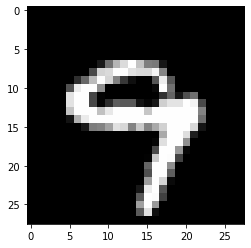

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
data = np.load('/content/sample_data/mnist_train_small (1).npy')
X = data[:, 1:]
y = data[:, 0]
X.shape, y.shape
plt.imshow(X[2].reshape(28, 28),cmap='gray')
y[2]






(array([[-7.72642091, -8.39495682],
        [ 5.45339605,  0.74230537],
        [-2.97867201,  9.55684617],
        [ 6.04267315,  0.57131862],
        [-6.52183983, -6.31932507]]), array([2, 1, 0, 1, 2]))

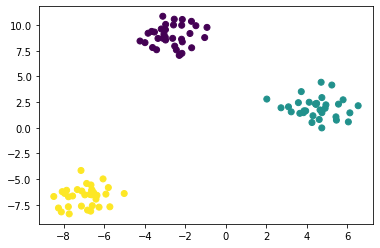

In [ ]:
#import matplotlib.pyplot as plt
#from sklearn.datasets import make_blobs
X,y = make_blobs(n_samples=100, centers=3,random_state=42)
plt.scatter(X[:,0],X[:,1],c=y)
X[:5],y[:5]

[ 1 -2  1  1  3 -3  3 -4  2  3 -1 -2  3 -1 -4 -1 -1 -4  3 -3  2  0 -1  0
  2  1 -3  1 -1  2  1 -2 -2 -2 -3  0  0 -4 -3 -4  2 -1  0  2  1 -2 -2 -2
 -4 -4 -3 -2  3  1  3  2  0 -1  2  2 -2 -1 -4 -3 -3  1 -4  2  1  0 -4 -4
  3  1  2 -4  0  1  2  0  3  1  1 -3 -1  2  1 -1  2 -3 -2  2 -1  0 -1 -2
  1 -3  2 -3 -3 -1  2  1 -2  3  2  3  0  2  0  1  3  3 -1  0  3 -4 -4  3
  2  2 -1  0 -3  1 -2  1  3 -3 -2 -1 -3 -3  2  1  3 -4  1 -1 -2  2  0  3
 -2 -1 -4 -2  1  1  2  0  3 -2 -2 -2 -4  3 -1 -1 -3  0  1  1 -3  0  3 -3
 -1  1 -1  2 -2 -4 -1  0 -4  2 -1 -3  1 -2  0  0  1 -2  3  3  0  0  0  0
  2 -3  0  2 -4  0 -2 -2 -2 -3  2 -4  2  1 -3  3 -2 -3 -4  2  0  1  2 -2
 -3  3 -4  0  0  3 -4 -4  0  1 -3 -4 -4 -4 -1 -4 -1  2 -3 -4  3  2  1 -1
 -1  0  3  2  1 -3  3  3 -2 -3 -4  1 -2  1  2  0  1 -3  0  2 -4  1 -2 -2
 -4  2 -1 -3  0 -3  0 -4 -3  1 -3  0 -2 -3  0  0  1  0 -4 -4  0 -1  1  1
  2 -3 -3 -2 -1  2 -4  1  3 -4 -4 -4 -1  2 -1  1  2  1 -1 -3  2  0 -1  3
  3 -1 -4 -2 -4  3 -3 -1 -4 -1  3 -1 -3  1  1  3  3

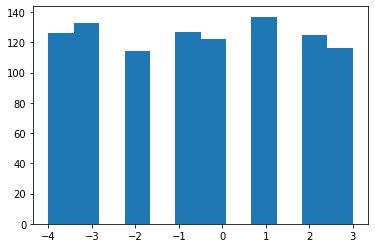

In [ ]:
#import matplotlib.pyplot as plt
#import numpy as np
x = np.random.randint(-4, 4, 1000)
print(x)
out = plt.hist(x, bins=12)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
...     X, y, test_size=0.33, random_state=42)           #splitting the data in 2 parts test_data =33% and train_data=67%
X_train.shape,y_train.shape
X_test.shape,y_test.shape


((6600, 784), (6600,))

In [48]:
#inbuilt knn class

from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
# training the model happens in fit function
# plotting the points on the graph
# no work is happening in traingin knn model
model.fit(X_train, y_train)
model.predict(X_test[:10])



array([1, 7, 0, 9, 4, 5, 4, 6, 9, 2], dtype=uint8)

In [ ]:
y_test[:10]


array([7, 7, 0, 9, 4, 5, 4, 6, 9, 2], dtype=uint8)

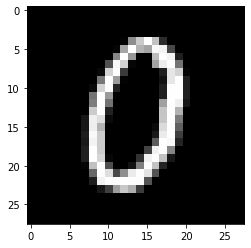

In [49]:
plt.imshow(X_test[2].reshape(28, 28), cmap='gray')

In [50]:
model.score(X_test[:100], y_test[:100])

0.95

In [51]:
#Custom KNN - Our own KNN implementation from scratch!

class CustomKNN:
    # constructor
    def __init__(self, n_neighbours=5):
        self.n_neighbours = n_neighbours
        
    # training function
    def fit(self, X, y):
        self._X = (X - X.mean()) / X.std() # standardisation
        self._y = y
    
    # predict point
    # given a single point, tell me which class it belongs to 
    def predict_point(self, point):
        # storing the dis of given 'point' from each point in training data
        list_dist = []
        
        # these points are from my training data
        for x_point, y_point in zip(self._X, self._y):
            dist_point = ((point - x_point) ** 2).sum()
            list_dist.append([dist_point, y_point])
        
        ## sorting the list according to the distance
        sorted_dist = sorted(list_dist)
        top_k = sorted_dist[:self.n_neighbours]
        
        # taking the count 
        items, counts = np.unique(np.array(top_k)[:, 1], return_counts=True)
        ans = items[np.argmax(counts)]
        return ans
            
    # predict
    # give me answer for each number in the array
    def predict(self, X):
        results = []
        X = (X - X.mean()) / X.std() 
        for point in X:
            results.append(self.predict_point(point))
        return np.array(results, dtype=int)
    
    # score to measure my accuracy
    def score(self, X, y):
        return sum(self.predict(X) == y) / len(y)

In [52]:

m2 = CustomKNN()
m2.fit(X_train, y_train)
m2.predict(X_test[:10])

y_test[:10]

m2.score(X_test[:100], y_test[:100])

0.95

In [55]:
#just for practice
li = [ 
    [23, 0],
    [45, 1],
    [19, 0],
    [3, 2],
    [10, 0],
    [34, 2],
    [100, 1]
]
sorted_li = sorted(li)
top_k = sorted_li[:5]
top_k

[[3, 2], [10, 0], [19, 0], [23, 0], [34, 2]]

In [57]:
li, counts = np.unique(np.array(top_k)[:, 1], return_counts=True)
li, counts

(array([0, 2]), array([3, 2]))